# Midterm Q1 Analysis
### Data Analysis of ENRON email Dataset
- Only the sent email of the 150 employees are considered for analysis to avoid duplicate and spam emails (which are usually present in the inbox)
- The timestamp and the subject of these emails are extracted
- Using  online reference 4 different categories of lists are created named meetings, process, core and casual
- The words in the subject are matched against these 4 categories and are counted against each date
- The monthly count of all 4 categories of words are calculated
- Using matplotlib, plots are drawn to compare the usage of words every month across three years

In [84]:
#creating 4 different categories of lists for sentiment analysis
meetings = ["message","origin","pleas","email","thank","attach","file","cop","inform","receiv"]
process = ["deal","enron","agreement","chang","contract","corp","fax","houston","date","america"]
core = ['market','gas','price','power','company','energy','trade','busi','servic']
casual = ['thank','call','time','meet','look','week','day','dont','vinc','talk']


In [85]:
#reading all the sent mails using glob function
from datetime import datetime
import glob
import csv
from email.parser import Parser
json_files7 = glob.glob("maildir/*/_sent_mail/*")

#creating empty lists to be count the number of corresponding words
meeting_csv = []
process_csv = []
core_csv = []
casual_csv = []

count_meetings = 0
count_process = 0
count_core = 0
count_casual = 0

for file in json_files7:
    try:
        with open(file) as data_file:
            email = Parser().parse(data_file)
            subject = email['Subject']  #extract the subject of each email
            date = email['Date']        #extract the date from each email
            datetime_object = datetime.strptime(date[5:-21], '%d %b %Y').date() #convert date from string to date format
            month = datetime_object.month #extract month from date
            year = datetime_object.year   #extract year from date
            
            #check and count the words against each category
            if any(word in subject for word in meetings):
                count_meetings = count_meetings+1
                meeting_csv.append([year,month,count_meetings])
                    
            
            if any(word in subject for word in process):
                count_process = count_process+1
                process_csv.append([year,month,count_process])
            
            if any(word in subject for word in core):
                count_core = count_core+1
                core_csv.append([year,month,count_core])
            
            if any(word in subject for word in casual):
                count_casual = count_casual+1
                casual_csv.append([year,month,count_casual])
       
    except PermissionError:
        pass
    
#sort all the 4 lists based year and month    
meeting_csv.sort(key=lambda x: (x[0],x[1]))
process_csv.sort(key=lambda x: (x[0],x[1]))
casual_csv.sort(key=lambda x: (x[0],x[1]))
core_csv.sort(key=lambda x: (x[0],x[1]))


#write all 4 lists to their respective csv    
with open("enron_meetings.csv","w",encoding='utf-8') as myfile1:
    writer_meetings = csv.writer(myfile1, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_meetings.writerow(["Year","Month","Count"])
    for a in range(0,len(meeting_csv)):
        writer_meetings.writerow([meeting_csv[a][0],meeting_csv[a][1],meeting_csv[a][2]])
        
with open("enron_process.csv","w",encoding='utf-8') as myfile2:
    writer_process = csv.writer(myfile2, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_process.writerow(["Year","Month","Count"])
    for a in range(0,len(process_csv)):
        writer_process.writerow([process_csv[a][0],process_csv[a][1],process_csv[a][2]])
    
with open("enron_core.csv","w",encoding='utf-8') as myfile3:
    writer_core = csv.writer(myfile3, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_core.writerow(["Year","Month","Count"])
    for a in range(0,len(core_csv)):
        writer_core.writerow([core_csv[a][0],core_csv[a][1],core_csv[a][2]])
    
with open("enron_casual.csv","w",encoding='utf-8') as myfile4:
    writer_casual = csv.writer(myfile4, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer_casual.writerow(["Year","Month","Count"])
    for a in range(0,len(casual_csv)):
        writer_casual.writerow([casual_csv[a][0],casual_csv[a][1],casual_csv[a][2]])
    
print(count_meetings)
print(count_process)
print(count_core)
print(count_casual)

263
1308
454
1235


In [86]:
#recursive function to accumulate count over months and years
def rec(a):
    if a[i][0] == a[i+1][0]:
            if a[i][1] == a[i+1][1]:
                atotal = a[i][2]+a[i+1][2]
                #aprint_meeting.append([a[i][0],a[i][1],atotal])
                a[i][2] =atotal
                del(a[i+1])
                rec(a)

In [87]:
#getting a total count of meeting words in three years
try:
    for i in range(0,len(meeting_csv)):
        if meeting_csv[i][0] == meeting_csv[i+1][0]:
            if meeting_csv[i][1] == meeting_csv[i+1][1]:
                meeting_csv[i][2]= meeting_csv[i][2]+meeting_csv[i+1][2]
                del(meeting_csv[i+1])
                rec(meeting_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

    
#getting a total count of process words in three years
try:
    for i in range(0,len(process_csv)):
        if process_csv[i][0] == process_csv[i+1][0]:
            if process_csv[i][1] == process_csv[i+1][1]:
                process_csv[i][2]= process_csv[i][2]+process_csv[i+1][2]
                del(process_csv[i+1])
                rec(process_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    

#getting a total count of core words in three years
try:
    for i in range(0,len(core_csv)):
        if core_csv[i][0] == core_csv[i+1][0]:
            if core_csv[i][1] == core_csv[i+1][1]:
                core_csv[i][2]= core_csv[i][2]+core_csv[i+1][2]
                del(core_csv[i+1])
                rec(core_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    

#getting a total count of casual words in three years
try:
    for i in range(0,len(casual_csv)):
        if casual_csv[i][0] == casual_csv[i+1][0]:
            if casual_csv[i][1] == casual_csv[i+1][1]:
                casual_csv[i][2]= casual_csv[i][2]+casual_csv[i+1][2]
                del(casual_csv[i+1])
                rec(casual_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [88]:
#core_csv

In [89]:
#casual_csv

In [90]:
#process_csv

In [91]:
#meeting_csv

In [92]:
#data for plots

#recursive function to accumulate count over months
meeting_csv.sort(key=lambda x: x[1])
process_csv.sort(key=lambda x: x[1])
core_csv.sort(key=lambda x: x[1])
casual_csv.sort(key=lambda x: x[1])

def rec1(a):
    if a[i][1] == a[i+1][1]:
        atotal = a[i][2]+a[i+1][2]
        a[i][2] =atotal
        del(a[i+1])
        rec(a)

In [93]:
#accumulating monthly message data
try:
    for i in range(0,len(meeting_csv)):
            if meeting_csv[i][1] == meeting_csv[i+1][1]:
                meeting_csv[i][2]= meeting_csv[i][2]+meeting_csv[i+1][2]
                del(meeting_csv[i+1])
                rec1(meeting_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    

#accumulating monthly core data
try:
    for i in range(0,len(core_csv)):
            if core_csv[i][1] == core_csv[i+1][1]:
                core_csv[i][2]= core_csv[i][2]+core_csv[i+1][2]
                del(core_csv[i+1])
                rec1(core_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    
    
#accumulating monthly process data
try:
    for i in range(0,len(process_csv)):
            if process_csv[i][1] == process_csv[i+1][1]:
                process_csv[i][2]= process_csv[i][2]+process_csv[i+1][2]
                del(process_csv[i+1])
                rec1(process_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    
#accumulating monthly casual data
try:
    for i in range(0,len(casual_csv)):
            if casual_csv[i][1] == casual_csv[i+1][1]:
                casual_csv[i][2]= casual_csv[i][2]+casual_csv[i+1][2]
                del(casual_csv[i+1])
                rec1(casual_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [94]:
#creating list to hold monthly count of words
month = []
message_count = []
casual_count = []
core_count = []
process_count = []
for i in range(0,len(meeting_csv)):
    month.append(meeting_csv[i][1])
    message_count.append(meeting_csv[i][2])
    casual_count.append(casual_csv[i][2])
    core_count.append(core_csv[i][2])
    process_count.append(process_csv[i][2])

In [98]:
#data for yearly plots

#recursive function to accumulate count over year
meeting_csv.sort(key=lambda x: x[0])
process_csv.sort(key=lambda x: x[0])
core_csv.sort(key=lambda x: x[0])
casual_csv.sort(key=lambda x: x[0])

def rec2(a):
    if a[i][0] == a[i+1][0]:
        atotal = a[i][2]+a[i+1][2]
        a[i][2] =atotal
        del(a[i+1])
        rec(a)

In [110]:
#accumulating yearly message data
try:
    for i in range(0,len(meeting_csv)):
            if meeting_csv[i][0] == meeting_csv[i+1][0]:
                meeting_csv[i][2]= meeting_csv[i][2]+meeting_csv[i+1][2]
                del(meeting_csv[i+1])
                rec2(meeting_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    

#accumulating monthly core data
try:
    for i in range(0,len(core_csv)):
            if core_csv[i][0] == core_csv[i+1][0]:
                core_csv[i][2]= core_csv[i][2]+core_csv[i+1][2]
                del(core_csv[i+1])
                rec2(core_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    
    
#accumulating monthly process data
try:
    for i in range(0,len(process_csv)):
            if process_csv[i][0] == process_csv[i+1][0]:
                process_csv[i][2]= process_csv[i][2]+process_csv[i+1][2]
                del(process_csv[i+1])
                rec2(process_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass
    
#accumulating monthly casual data
try:
    for i in range(0,len(casual_csv)):
            if casual_csv[i][0] == casual_csv[i+1][0]:
                casual_csv[i][2]= casual_csv[i][2]+casual_csv[i+1][2]
                del(casual_csv[i+1])
                rec2(casual_csv)
                #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],total])
    #print_meeting.append([meeting_csv[i][0],meeting_csv[i][1],meeting_csv[i][2]])
except IndexError:
        pass

In [111]:
core_csv

[[1999, 12, 10628], [2000, 1, 92657]]

In [112]:
meeting_csv

[[1999, 12, 2119], [2000, 1, 28700], [2001, 4, 3897]]

In [113]:
casual_csv

[[1999, 12, 80122], [2000, 1, 683108]]

In [114]:
process_csv

[[1999, 12, 80134], [2000, 1, 775952]]

In [117]:
#creating list to hold yearly count of words
year = []
message_count_year = []
casual_count_year = []
core_count_year = []
process_count_year = []
try:
    for i in range(0,len(meeting_csv)):
        year.append(meeting_csv[i][0])
        message_count_year.append(meeting_csv[i][2])
        casual_count_year.append(casual_csv[i][2])
        core_count_year.append(core_csv[i][2])
        process_count_year.append(process_csv[i][2])
except IndexError:
        pass

In [118]:
print(year)
print(message_count_year)
print(casual_count_year)
print(core_count_year)
print(process_count_year)

[1999, 2000, 2001]
[2119, 28700, 3897]
[80122, 683108]
[10628, 92657]
[80134, 775952]


In [95]:
print(month)
print(message_count)
print(casual_count)
print(core_count)
print(process_count)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[4123, 3045, 3042, 3897, 3938, 1555, 2417, 2968, 3235, 1601, 2776, 2119]
[61040, 59776, 86267, 92022, 59036, 44034, 31041, 50219, 53397, 76086, 70190, 80122]
[7079, 5493, 12902, 25259, 7107, 5466, 4774, 4216, 4241, 6085, 10035, 10628]
[89654, 104987, 130016, 110301, 62179, 39939, 43911, 32904, 69479, 42029, 50553, 80134]


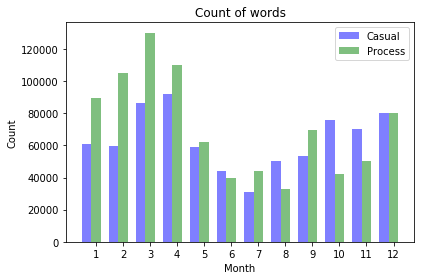

In [96]:
#not able to plot all 4 types in one single plot yet

import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 12
#count = message_count
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, casual_count, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Casual')

rects2 = plt.bar(index + bar_width, process_count, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Process')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of words')
plt.xticks(index + bar_width, range(1,13))
plt.legend()
 
plt.tight_layout()
plt.show()

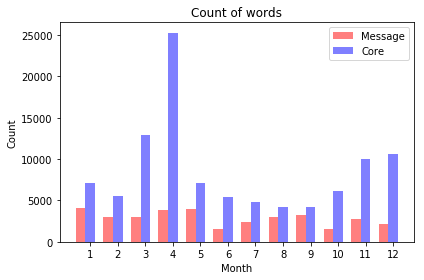

In [97]:
n_groups = 12
#count = message_count
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, message_count, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Message')

rects2 = plt.bar(index + bar_width, core_count, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Core')



plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of words')
plt.xticks(index + bar_width, range(1,13))
plt.legend()
 
plt.tight_layout()
plt.show()

In [81]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#print (__version__) 

In [119]:
#plotting usinf line plots
import plotly.plotly as py
import plotly.graph_objs as go

random_x = month
random_y0 = message_count
random_y1 = core_count
random_y2 = process_count
random_y3 = casual_count

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines+markers',
    name = 'Message'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'Core'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines+markers',
    name = 'Process'
)

trace3 = go.Scatter(
    x = random_x,
    y = random_y3,
    mode = 'lines+markers',
    name = 'Casual'
)
data = [trace0, trace1, trace2, trace3]

plot(data, filename='Word count for different types')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `Word count for different types` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/Word count for different types.html'

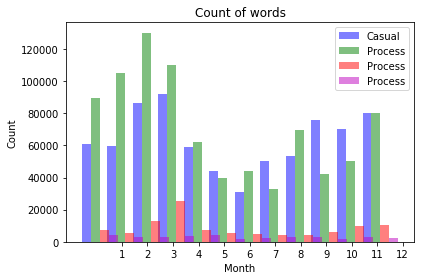

In [83]:
n_groups = 12
#count = message_count
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5

rects1 = plt.bar(index, casual_count, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Casual')

rects2 = plt.bar(index + bar_width, process_count, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Process')

rects3 = plt.bar(index + bar_width + bar_width , core_count, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Process')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, message_count, bar_width,
                 alpha=opacity,
                 color='m',
                 label='Process')


plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of words')
plt.xticks(index + bar_width + bar_width + bar_width + bar_width, range(1,13))
plt.legend()
 
plt.tight_layout()
plt.show()

In [120]:
#plotting usinf line plots for yearly data
import plotly.plotly as py
import plotly.graph_objs as go

random_x = year
random_y0 = message_count_year
random_y1 = core_count_year
random_y2 = process_count_year
random_y3 = casual_count_year

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines+markers',
    name = 'Message'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'Core'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines+markers',
    name = 'Process'
)

trace3 = go.Scatter(
    x = random_x,
    y = random_y3,
    mode = 'lines+markers',
    name = 'Casual'
)
data = [trace0, trace1, trace2, trace3]

plot(data, filename='Word count for different types')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/plotly/offline/offline.py:440: UserWarning:

Your filename `Word count for different types` didn't end with .html. Adding .html to the end of your file.



'file:///usr/local/share/Word count for different types.html'